<a href="https://colab.research.google.com/github/saadghojaria55/cnn/blob/main/Saad_Ghojaria_Neural_Network_Type_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 style='text-align:center;font-family:Comic Sans MS;font-size:40px;background-color:lightseagreen;border:20px;color:white'>Abstract</h2>
The purpose of this notebook is to perform charecter recognition on TMINST (94 charecter) dataset. We used a simple CNN network to perform the charecter recognition. Overall it was observed that the accuracy is close to 94.2% which is pretty good for a simple 7 layer CNN.

<h2 style='text-align:center;font-family:Comic Sans MS;font-size:40px;background-color:lightseagreen;border:20px;color:white'>Importing Libraries and Fuctions</h2>

In [1]:
import numpy as np 
import pandas as pd 
import re

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import tensorflow as tf 
from tensorflow.keras.utils import to_categorical


import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from google.colab import drive

<h2 style='text-align:center;font-family:Comic Sans MS;font-size:40px;background-color:lightseagreen;border:20px;color:white'>Reading Data</h2>

In [ ]:
# Reading Data
url = "/content/drive/MyDrive/94_character_TMNIST.csv"
#df = h2o.import_file(path = url)
drive.mount('/content/drive')

df = pd.read_csv(url)
df.head()

Mounted at /content/drive


,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,Salsa-Regular,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,MouseMemoirs-Regular,D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Creepster-Regular,f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,SeoulNamsan-Light,/,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,HachiMaruPop-Regular,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<h2 style='text-align:center;font-family:Comic Sans MS;font-size:40px;background-color:lightseagreen;border:20px;color:white'>Spliting input and labels</h2>
We will need this splitting in order to correctly label the predictions

In [ ]:
# Grouping All labels
all_ = list(df['labels'].unique())
pattern_uc = re.compile(r"[A-Z]")
print (pattern_uc)

re.compile('[A-Z]')


In [ ]:
# Grouping All labels
all_ = list(df['labels'].unique())

# Regex Pattern to check alphabets, digits and special symbols
pattern_uc = re.compile(r"[A-Z]")
pattern_lc = re.compile(r"[a-z]")
pattern_numbers = re.compile(r"[0-9]")
pattern_symbols = re.compile(r"[\W]|[\_\,]")

# Extracting Pattern
lower_case = pattern_lc.findall(str(all_))
Upper_case = pattern_uc.findall(str(all_))
Numbers_ = pattern_numbers.findall(str(all_))
Symbols_ = list(set(pattern_symbols.findall(str(all_))))
print(Symbols_)

# Creating Gropus
group = 1
for list_ in (lower_case,Upper_case,Numbers_,Symbols_):
    df.loc[df['labels'].isin(list_), 'group'] = str(group)
    group += 1
print(group)

['[', '+', '-', '?', '/', '.', '<', "'", '}', '(', ' ', '_', '=', '@', '%', '\\', '`', '>', '#', '!', '"', '~', ',', '$', '^', ')', '|', ']', '*', ';', '{', '&', ':']
5


In [ ]:
# defining X and y for training
X = df.iloc[:, 2:-1].astype('float32') 
y  = df[['labels']] 

In [ ]:
#preping the data to create dictionary
labels = y['labels'].unique()
values = [num for num in range(len(df['labels'].unique()))]
label_dict= dict(zip(labels,values)) #Creating Dictionary 
label_dict_inv = dict(zip(values,labels))

In [ ]:
# Mapping
y['labels'].replace(label_dict, inplace=True) #Maping Values

In [ ]:
#Checking the mappings
print(label_dict)

{'6': 0, 'D': 1, 'f': 2, '/': 3, 'F': 4, 'x': 5, 'J': 6, '8': 7, 'H': 8, 'k': 9, '@': 10, '1': 11, '=': 12, 'g': 13, ')': 14, '2': 15, 'd': 16, '^': 17, '3': 18, 't': 19, '#': 20, '.': 21, '4': 22, 'o': 23, '"': 24, 'y': 25, 'A': 26, 'u': 27, 'G': 28, '-': 29, 'm': 30, 'W': 31, '&': 32, 'c': 33, '9': 34, 'N': 35, ']': 36, 'P': 37, 'X': 38, '|': 39, '}': 40, 'h': 41, '7': 42, 'j': 43, '5': 44, '>': 45, '?': 46, 'b': 47, '*': 48, 'w': 49, 'l': 50, '0': 51, '$': 52, 'I': 53, 'Y': 54, '%': 55, ':': 56, 'T': 57, 'K': 58, 'E': 59, '<': 60, 'V': 61, '{': 62, 'M': 63, 'S': 64, 'a': 65, 'i': 66, 'r': 67, "'": 68, 'p': 69, ';': 70, '[': 71, '+': 72, 'e': 73, 'U': 74, '(': 75, 's': 76, '~': 77, ',': 78, 'C': 79, 'q': 80, '_': 81, 'n': 82, 'B': 83, 'z': 84, 'v': 85, 'O': 86, 'R': 87, '`': 88, 'Z': 89, 'Q': 90, 'L': 91, '!': 92, '\\': 93}


<h2 style='text-align:center;font-family:Comic Sans MS;font-size:40px;background-color:lightseagreen;border:20px;color:white'>Creating Training and Test Sets</h2>

In [ ]:
# creating test train split of 80% and 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
# preping the inputs for training
Length, Height = 28,28
NCl = y_train.nunique()[0] # Unique targets

# N of images 28x28
X_train = np.reshape(X_train.values, (X_train.shape[0] ,Length, Height)) 
X_test = np.reshape(X_test.values, (X_test.shape[0] ,Length, Height))

# Target into Categorical Values
y_train = to_categorical(y_train, NCl, dtype='int' )
y_test = to_categorical(y_test, NCl, dtype='int' )

print(f'X:Train, Test data shape:{X_train.shape},{X_test.shape}')
print(f'Y:Train, Test data shape:{y_train.shape},{y_test.shape}')

X:Train, Test data shape:(219274, 28, 28),(54819, 28, 28)
Y:Train, Test data shape:(219274, 94),(54819, 94)


<h2 style='text-align:center;font-family:Comic Sans MS;font-size:40px;background-color:lightseagreen;border:20px;color:white'>Showing samples from the Dataset</h2>

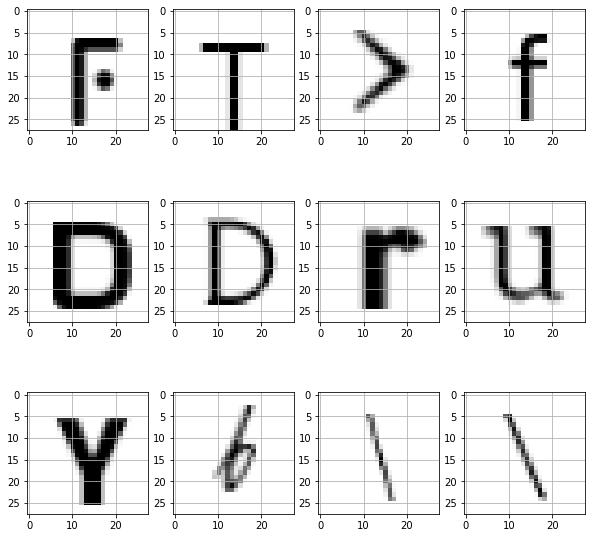

In [ ]:
# displaying the charecters of our dataset
random = shuffle(X_train[:500]) #Randomly shuffle
fig,ax = plt.subplots(3,4 , figsize = (10,10)) 
axes = ax.flatten()
for i in range(12):
    img = np.reshape(random[i], (28,28)) # reshaping it for displaying
    axes[i].imshow(img, cmap="Greys")
    img_final =np.reshape(img, (1,28,28,1)) # reshapng it for passing into model for prediction
    axes[i].grid()

<h2 style='text-align:center;font-family:Comic Sans MS;font-size:40px;background-color:lightseagreen;border:20px;color:white'>Importing libraries for building Neural Networks</h2>


In [ ]:
# importing libraries for building neural netwrok
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D,Flatten,Dropout,BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping

<h6 style='text-align:center;font-family:Comic Sans MS;font-size:40px;background-color:lightseagreen;border:20px;color:white'>Preping the input for CNN</h3>

In [ ]:
RGB = 1  # In this case only one instead of 3 because we dont have Color images
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],X_train.shape[2], RGB)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2],RGB)

#normalizing the image data
X_train = X_train/255
X_test = X_test/255
print(f'Train, Test shapes: {X_train.shape},{X_test.shape}')

Train, Test shapes: (219274, 28, 28, 1),(54819, 28, 28, 1)


<h6 style='text-align:center;font-family:Comic Sans MS;font-size:40px;background-color:lightseagreen;border:20px;color:white'>Building the CNN Architecture</h6>

![](https://miro.medium.com/max/1200/1*XbuW8WuRrAY5pC4t-9DZAQ.jpeg)

In [ ]:
model = Sequential ()

# 4 Conv with Maxpool and Dropout [25%] -> Flatten - >  Dense -> Dense -> output 
model.add(Conv2D(filters = 32 , kernel_size = (3,3),input_shape = (Length, Height, RGB), padding = 'same',))
model.add(BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64 , kernel_size = (3,3) ,padding = 'same'))
model.add(BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 128 , kernel_size = (3,3) ,padding = 'same'))
model.add(BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 256 , kernel_size = (3,3) ,padding = 'same'))
model.add(BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(350))
model.add(BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(NCl, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        1

In [ ]:
#defining parameters for training
optimizer  = Adam(learning_rate=0.01)
callback =EarlyStopping(monitor='loss', patience=5)
Batch_ = 64
Epochs_ = 20

model.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])


<h6 style='text-align:center;font-family:Comic Sans MS;font-size:40px;background-color:lightseagreen;border:20px;color:white'>Training the model</h6>

In [ ]:
#Training
history= model.fit(X_train,y_train, validation_data = (X_test,y_test),batch_size = Batch_ ,
                   epochs = Epochs_, verbose = 1)

Epoch 1/20
3427/3427 [==============================] - 760s 221ms/step - loss: 0.3275 - accuracy: 0.8991 - val_loss: 0.2417 - val_accuracy: 0.9229
Epoch 2/20
3427/3427 [==============================] - 748s 218ms/step - loss: 0.3120 - accuracy: 0.9032 - val_loss: 0.2350 - val_accuracy: 0.9218
Epoch 3/20
3427/3427 [==============================] - 736s 215ms/step - loss: 0.3029 - accuracy: 0.9060 - val_loss: 0.2252 - val_accuracy: 0.9283
Epoch 4/20
3427/3427 [==============================] - 747s 218ms/step - loss: 0.2937 - accuracy: 0.9079 - val_loss: 0.2195 - val_accuracy: 0.9283
Epoch 5/20
3427/3427 [==============================] - 748s 218ms/step - loss: 0.2892 - accuracy: 0.9092 - val_loss: 0.2148 - val_accuracy: 0.9303
Epoch 6/20
3427/3427 [==============================] - 744s 217ms/step - loss: 0.2826 - accuracy: 0.9114 - val_loss: 0.2068 - val_accuracy: 0.9335
Epoch 7/20
3427/3427 [==============================] - 730s 213ms/step - loss: 0.2789 - accuracy: 0.9124 - val_

<h6 style='text-align:center;font-family:Comic Sans MS;font-size:40px;background-color:lightseagreen;border:20px;color:white'>Evaluating the model</h6>

In [ ]:
#Evaluating model accuracy on test data
score = model.evaluate(X_test,y_test, batch_size = Batch_,verbose = 0)
print(f"Test Accuracy:{round(score[1],4)*100}%")


Test Accuracy:93.66%


<h2 style='text-align:center;font-family:Comic Sans MS;font-size:40px;background-color:lightseagreen;border:20px;color:white'>Visalizing the model performance</h2>

In [ ]:
# Function for Plotting
def Plott (data):
    fig, ax = plt.subplots(1,2 , figsize = (20,7))
    # summarize history for accuracy
    ax[0].plot(data.history['accuracy'])
    ax[0].plot(data.history['val_accuracy'])
    ax[0].set_title('model accuracy')
    ax[0].legend(['train', 'test'], loc='upper left')

    # summarize history for loss
    ax[1].plot(data.history['loss'], label =['loss'])
    ax[1].plot(data.history['val_loss'] ,label =['val_loss'])
    ax[1].set_title('model loss')
    ax[1].legend(['train', 'test'], loc='upper left')
    plt.show()

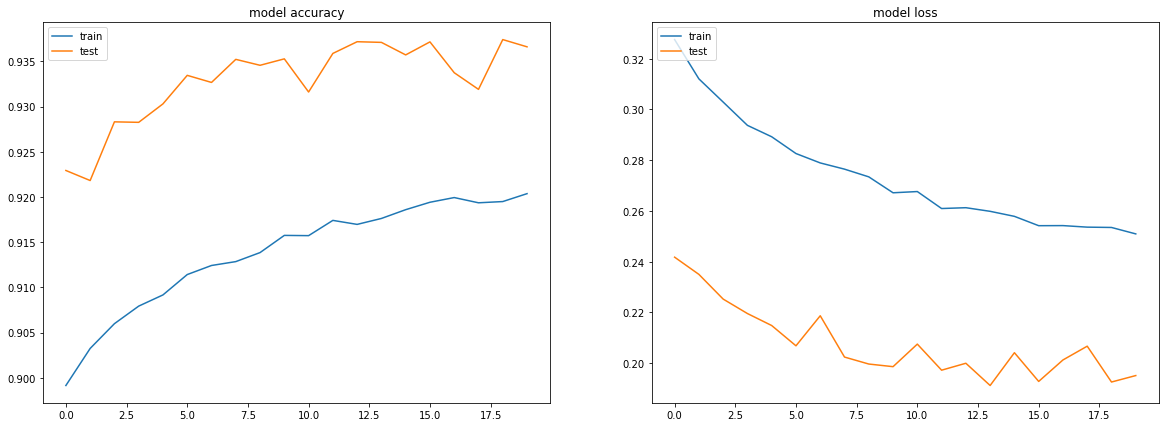

In [ ]:
Plott(history)

<h2 style='text-align:center;font-family:Comic Sans MS;font-size:40px;background-color:lightseagreen;border:20px;color:white'>Making Final Predictions</h2>

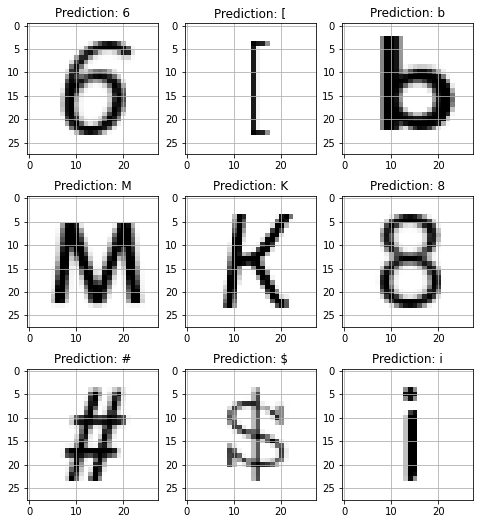

In [ ]:
#predicting the charecters using trained model
fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()

for i,ax in enumerate(axes):
    img = np.reshape(X_test[i], (28,28)) # reshaping it for displaying
    ax.imshow(img, cmap="Greys")
    img_final =np.reshape(img, (1,28,28,1)) # reshapng it for passing into model for prediction
    pred = label_dict_inv[np.argmax(model.predict(img_final))]
    ax.set_title("Prediction: "+pred)
    ax.grid()

<h2 style='text-align:center;font-family:Comic Sans MS;font-size:40px;background-color:lightseagreen;border:20px;color:white'>Conclusion</h2>
1. The model performed good and was able to predict with 100% accuracy (9 out of 9 predictions are correct)<br>
2. The accuracy on test test is 94.17% which is pretty decent for a simple CNN
